# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake


## Data validation

**The original dataset has 15000 rows and 8 columns. After validation, 13926 rows remained with 8 columns. 
Details of data validation for each column is as following:**

- **Week:** Values are between 1 to 6 without missing values. Therefore, this matches what is expected.
 
- **Sales_method:** There were 5 categories and I replaced 2 inconsistent categories with correct ones. Therefore, it remains three categories as follows: Call, Email, Email + Call.

- **Customer_id:** No cleaning needed. Only unique values without any duplicates, this matches what is expected.
 
- **Nb_sold:** Values are in the range of 7 and 16 with an average of 10.05, without missing values. All values match as expected. 
 
- **Revenue:**
        Values are in the range of 32.54 and 238.32 with an average of 93.93. 7% of data was “missing at random” and all of them               were in the “Email + Call” category. 
        After studying the imputation effect and considering that the amount of missing data is small, I removed 1074 rows and 13926          rows are remained.

- **Years_as_customer:** Values are between 0 to 63 with an average of 5, without missing values. Therefore, data matches as expected. 

- **Nb_site_visits:** Values are between 12 to 37 with an average of 25. Without missing values. Therefore, data matches as expected.
 
- **State:** There are 50 unique states, without missing values and any inconsistent categories. Therefore, data matches as expected.


## How many customers were there for each approach?


Following the launch of new line for the office stationary three different approaches have been used to promote sales; namely, calling the customers, sending emails and combination of both. 

As it is depicted in the figure below the number of customers contacted via email is significantly higher than other approaches with total count of more than 7000, due to the fact that emailing is faster. 
On the second level are the count of customers contacted via call which is less than 5000. Finally, there are the customers who have been contacted via email and a follow up call a week later which is about half of the number of the people who have been contacted by call. 
The exact numbers are presented in the tables below. 

|Sales Methods|Total number of Customers|
|:---:|:---:|
|Call|4962|
|Email|7466|
|Email + Call|2572|    


![Break down category](figure1.png)


## What does the spread of the revenue look like overall? And for each method?

As it is shown in the figure below the distribution of the data is not normal. We can see that there are two peaks one around 80 and the other around 50. Additionally, we can see that the revenues higher than 120 are quite low in terms of the total number. 

In the next figure we can learn more and realize the reason for the figure not being normal. Please note that, 7% of the data was missing and they are replaced by median to avoid bias.  



![Break down category](figure2.png)

In the graph of spread of the revenue we can clearly see that each approach resulted in different revenue. The customers who have been contacted by email and phone produced the revenue of approximately 150 to 180. This is much higher than customers who have been contacted solely by email, which is about 80 to 110. And the least revenue is generated from the customers who have been contacted by call with the median of 50.

Note worthy to mention that there are not lot of outliers except for the email approach which needs more precision in data collection. 


![Break down category](figure3.png)




## Was there any difference in revenue over time for each of the methods?

This graph shows that overall, the amount of revenue has increased during the time for all three methods. However, we can see that the increase in revenue is steeper for the approach of email and call together relative to the other approaches. This suggests that email and call approach may even generate more revenue in future, judging by comparing the slope of trendlines.

![Break down category](figure4.png)


## Additional Notes: 

### Effect of Loyalty

The study of revenue versus years as customers column gives us two findings. First of all, it seems that the loyalty of the majority of customers is less than ten years. Secondly, for the rest of the group email and call had an adverse effect. However, more studies are required to confirm this finding. 

![Break down category](figure5.png)

![Break down category](figure6.png)


## Based on the data, which method would you recommend we continue to use?

In conclusion, the approach of combination of email and call can bring more benefit to the company as it can generate more revenue: **1.9 times of sending email and 3.6 times of calling**. And this prospect probably would even improve in future. Nevertheless, sending only email to the customers for those products with low market value may worth considering due to the fact that the email approach is almost effortless timewise. 

## Suggestion

We recommend that the calling approach should be dropped as it is quite time consuming and doesn’t even generate proper benefit. 


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [3]:
# import python packages

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


In [4]:
# Read in the data

df = pd.read_csv('product_sales.csv')

In [5]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
# Let's look at the data

df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [7]:
# To check null values

df.isnull().any()

week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue               True
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool

In [8]:
# To calculate how much is missing in revenue

print(np.mean(df['revenue'].isnull())*100)

7.16


Text(0, 0.5, 'Total Count')

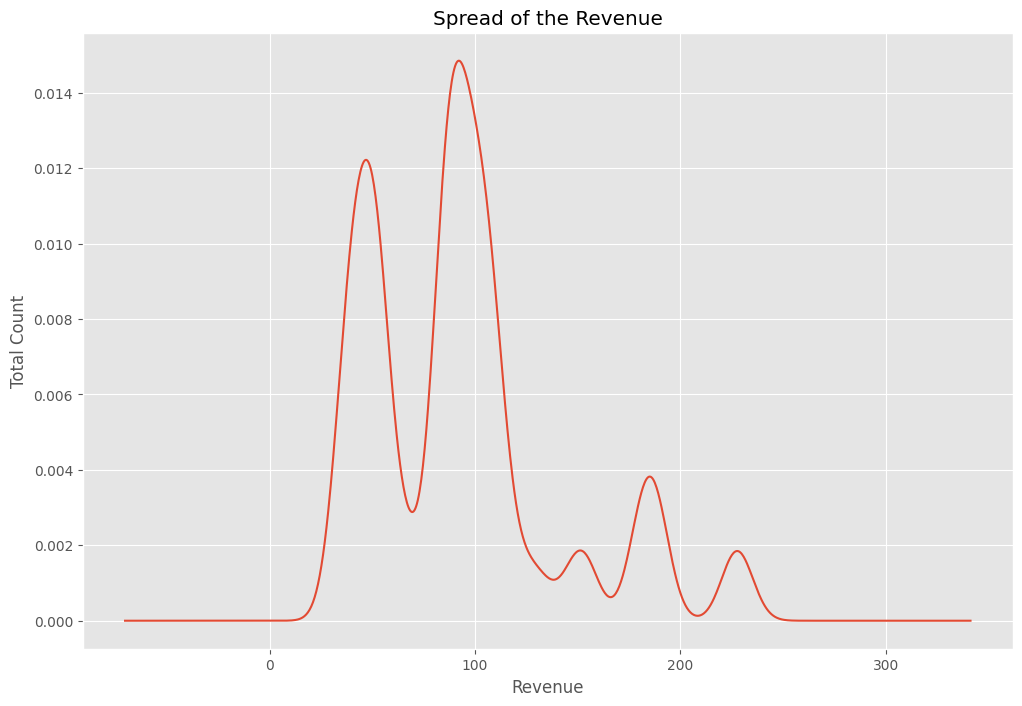

In [9]:
# To plot revenue to see what we should with the null values

df.revenue.plot(kind='kde')
plt.title("Spread of the Revenue")
plt.xlabel("Revenue")
plt.ylabel("Total Count")

In [10]:
# To calculate mode of revenue
from scipy import stats

x = df.revenue.median()
print(x)

# To eplace null values of revenue with median

df_cleaned = df
df_cleaned=df.dropna(subset=['revenue'])
print(df.shape)
print(df_cleaned.shape)
print(df_cleaned.isnull().any())
print(15000-13926)

89.5
(15000, 8)
(13926, 8)
week                 False
sales_method         False
customer_id          False
nb_sold              False
revenue              False
years_as_customer    False
nb_site_visits       False
state                False
dtype: bool
1074


In [11]:
# To clean the sales_method 

df_cleaned.sales_method = df_cleaned.sales_method.replace("email", "Email")
df_cleaned.sales_method = df_cleaned.sales_method.replace ("em + call","Email + Call")
df_cleaned.sales_method.unique()

# To change the type of sale_method

df_cleaned.sales_method = df_cleaned.sales_method.astype('category')
df_cleaned.sales_method

1        Email + Call
2                Call
4               Email
5                Call
6               Email
             ...     
14994           Email
14995            Call
14996            Call
14997            Call
14998            Call
Name: sales_method, Length: 13926, dtype: category
Categories (3, object): ['Call', 'Email', 'Email + Call']

In [12]:
# To find unique values
print(df.week.unique())
print(df.state.unique())
print(len(df.state.unique()))
print(df.sales_method.unique())
print(len(df.sales_method.unique()))

[2 6 5 4 3 1]
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']
50
['Email' 'Email + Call' 'Call' 'em + call' 'email']
5


In [13]:
# To see if there is any duplicate

df_cleaned.customer_id.duplicated().any()


False

In [27]:
# Number of customers for each approach

customers_group = df_cleaned.groupby("sales_method")["customer_id"].count()
print(customers_group)
customers_average = df_cleaned.groupby("sales_method")["revenue"].mean()
#print(customers_average)
customers_median = df_cleaned.groupby("sales_method")["revenue"].median()
#print(customers_median)
ratio = (182.135 / 94.275)
ratio2= (182.135/49.935)
#print(ratio)
#print(ratio2)

sales_method
Call            4781
Email           6922
Email + Call    2223
Name: customer_id, dtype: int64


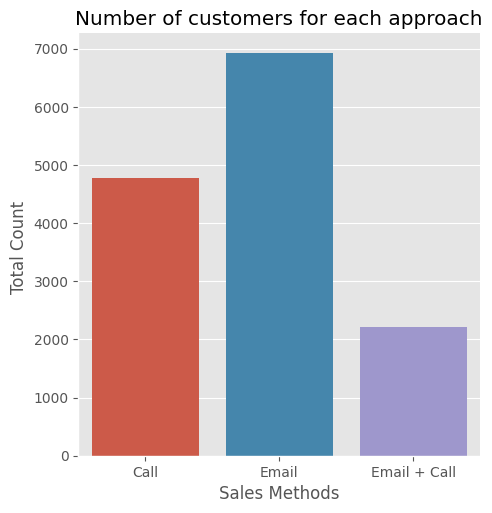

In [15]:
# Plot Number of customers for each approach

sns.catplot(x="sales_method", data= df_cleaned, kind="count")
plt.title("Number of customers for each approach")
plt.xlabel("Sales Methods")
plt.ylabel("Total Count ")

plt.show()

Text(0, 0.5, 'Total Count')

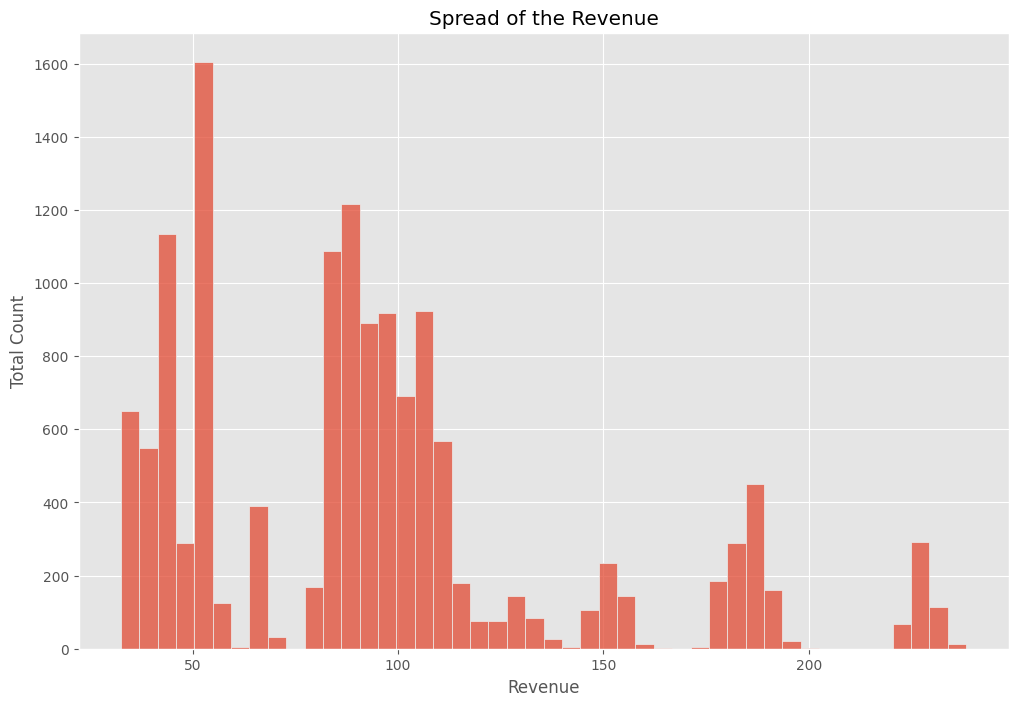

In [16]:
# To demostrate spread of the revenue 

sns.histplot(x='revenue',data=df_cleaned)
plt.title("Spread of the Revenue")
plt.xlabel("Revenue")
plt.ylabel("Total Count")


Text(0, 0.5, 'Sales method')

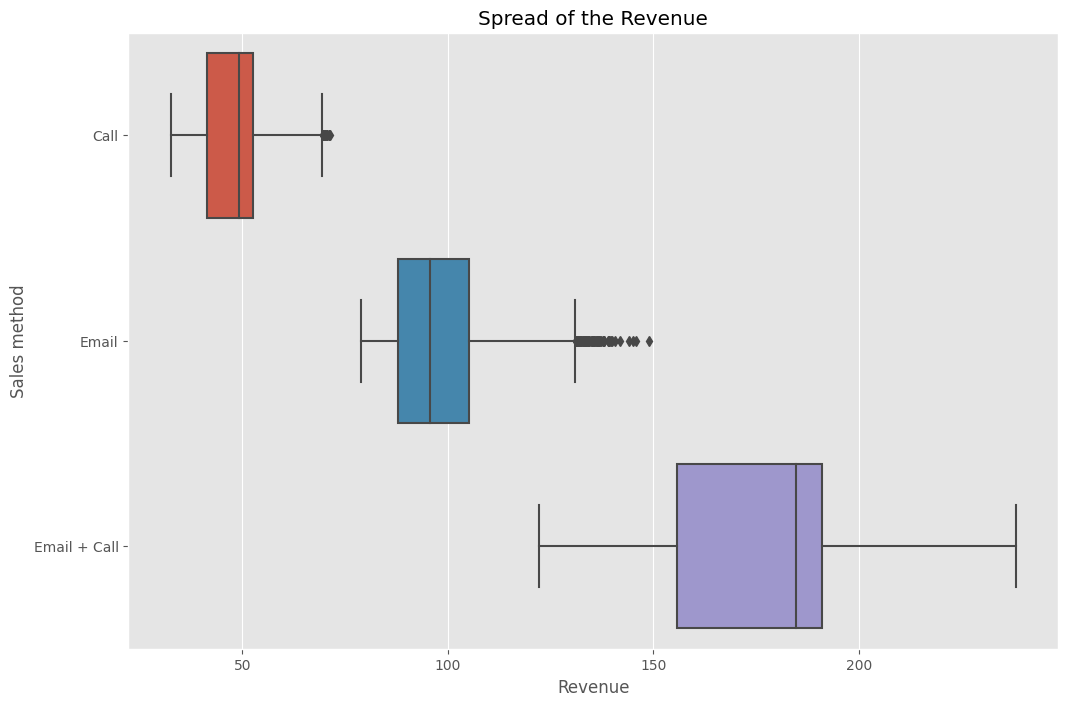

In [17]:
sns.boxplot(data=df_cleaned, x='revenue' , y='sales_method' )
plt.title("Spread of the Revenue")
plt.xlabel("Revenue")
plt.ylabel("Sales method")

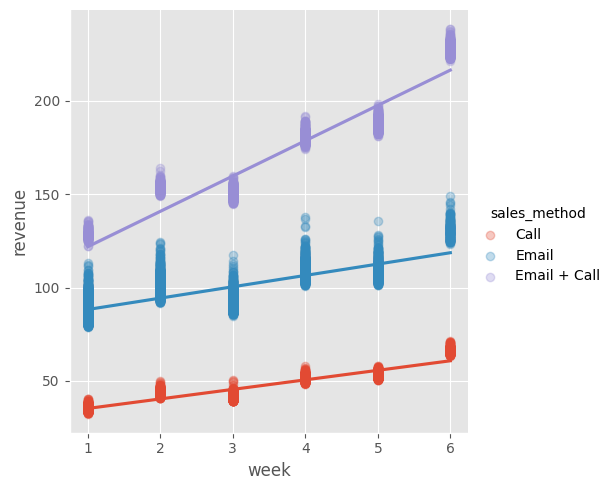

In [18]:
sns.lmplot(x='week',y='revenue', hue= 'sales_method', data= df_cleaned, scatter_kws={'alpha':0.3})


18.91059038092384 102.96434558566683 Email + Call
5.105988097712826 30.139281022105923 Call
6.077968142664469 82.16896340964578 Email
['y = 18.91 x + 102.96', 'y = 5.11 x + 30.14', 'y = 6.08 x + 82.17']


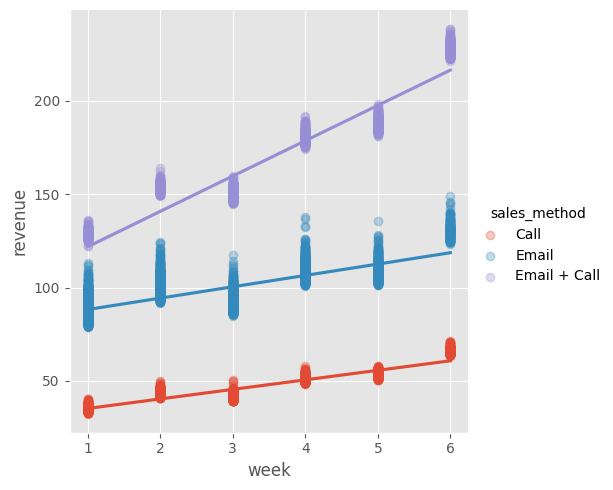

In [19]:
g= sns.lmplot(x='week',y='revenue', hue= 'sales_method', data= df_cleaned, scatter_kws={'alpha':0.3})
slopes=[]
lines= []
for s in df_cleaned.sales_method.unique():
    ddf = df_cleaned[ df_cleaned["sales_method"] == s]
    m,b,rv,pv, std = stats.linregress(ddf["week"], ddf["revenue"])  
    print(m,b,s)
    lines.append( f"y = {m:.2f} x + {b:.2f}" )
    
print(lines)
#plt.legend(title='Legend', loc='upper left', labels=[f'Call, {lines[0]}', f'Email, {lines[1]}', f'Email+Call, {lines[2]}'])

plt.show(g)

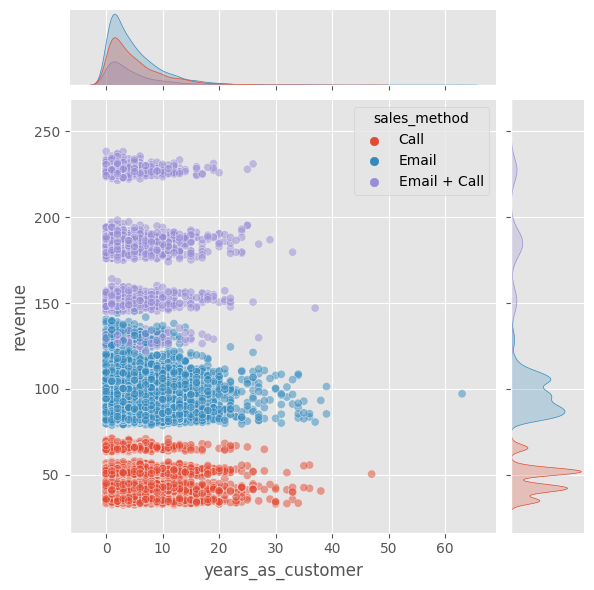

In [20]:
sns.jointplot(y='revenue',x='years_as_customer',hue='sales_method',data=df_cleaned,alpha=0.5,kind='scatter', marginal_kws=dict(rug=True))

In [21]:
Ave = df_cleaned[['nb_sold','years_as_customer','nb_site_visits','revenue']].mean()
Mi = df_cleaned[['nb_sold','years_as_customer','nb_site_visits','week','revenue']].min()
Ma = df_cleaned[['nb_sold','years_as_customer','nb_site_visits','week','revenue']].max()
print(Ave)
print(Mi)
print(Ma)

nb_sold              10.040069
years_as_customer     4.978960
nb_site_visits       24.947006
revenue              93.934943
dtype: float64
nb_sold               7.00
years_as_customer     0.00
nb_site_visits       12.00
week                  1.00
revenue              32.54
dtype: float64
nb_sold               16.00
years_as_customer     63.00
nb_site_visits        37.00
week                   6.00
revenue              238.32
dtype: float64


In [22]:
print(df.state.unique())

['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


Text(0, 0.5, 'Revenue ')

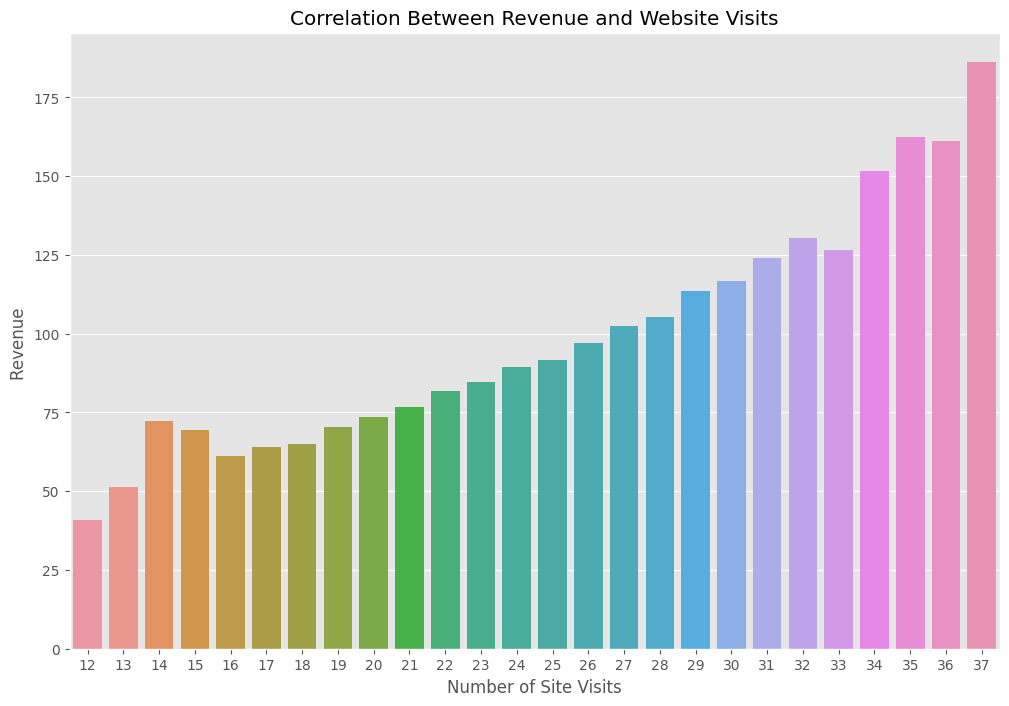

In [23]:
sns.barplot(x="nb_site_visits", y="revenue", data=df_cleaned, ci=False)
plt.title("Correlation Between Revenue and Website Visits")
plt.xlabel("Number of Site Visits")
plt.ylabel("Revenue ")

In [24]:
df_cleaned.corr(method='pearson')

,week,nb_sold,revenue,years_as_customer,nb_site_visits
week,1.000000,0.806590,0.356179,-0.082353,0.416492
nb_sold,0.806590,1.000000,0.696165,-0.098333,0.487669
revenue,0.356179,0.696165,1.000000,-0.064696,0.323089
years_as_customer,-0.082353,-0.098333,-0.064696,1.000000,-0.049012
nb_site_visits,0.416492,0.487669,0.323089,-0.049012,1.000000


<AxesSubplot: >

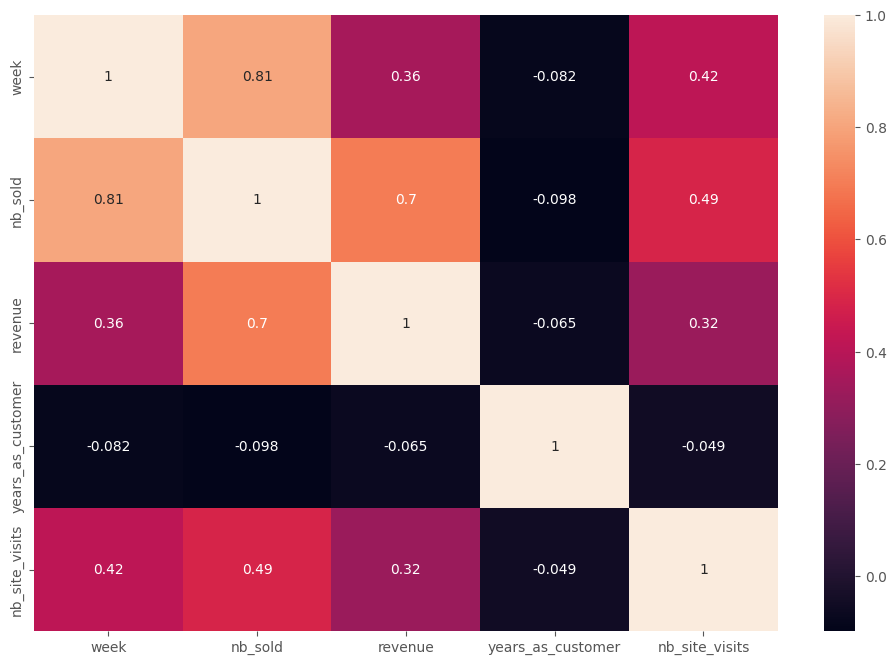

In [25]:
correlation_matrix = df_cleaned.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)